In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

2024-10-22 22:53:12.653591: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 22:53:12.664453: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 22:53:12.760319: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 22:53:12.874315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 22:53:12.974493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
(X_train,_),(X_test,_) = mnist.load_data() 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [5]:
X_train = X_train.reshape((60000,784))/255.0
X_test = X_test.reshape((10000,784))/255.0

In [6]:
encoding_dim = 32

In [8]:
input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [9]:
autoencoder = models.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [11]:
autoencoder.fit(X_train,X_train,epochs=3,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5515 - val_loss: 0.0720
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0473 - val_loss: 0.0155
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0131 - val_loss: 0.0083


In [13]:
encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


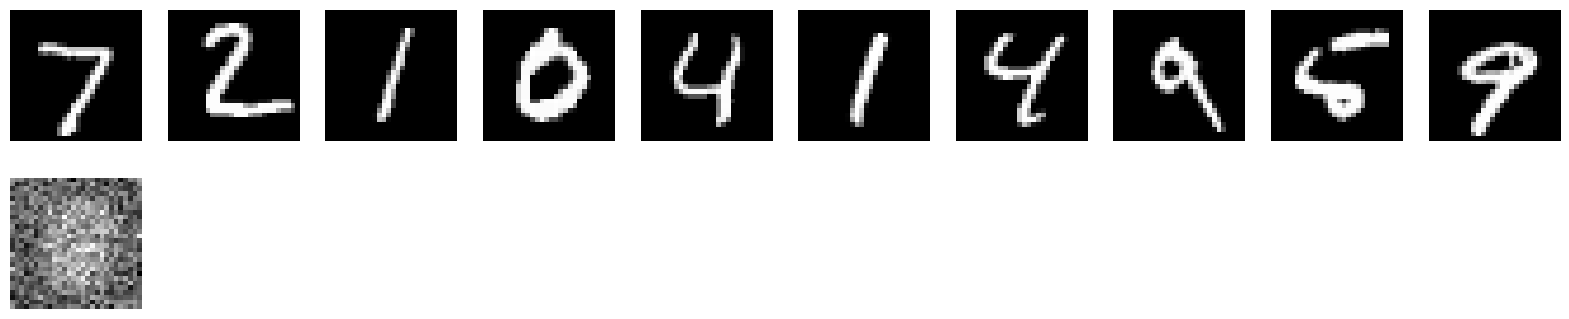

In [16]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(2,n,1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='gray')
    plt.axis('off')
plt.savefig('autoensor.png')
plt.show()
    